<a href="https://colab.research.google.com/github/Mary2agonz/colab-cd24/blob/main/Sprint_M5_MAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint Módulo 5**

Estudiante:

Marilyn Aguilar González


enlace github: https://github.com/Mary2agonz/colab-cd24/blob/main/Sprint_M5_MAG.ipynb

-------------------------------------------------------------------
**Objetivo del proyecto**:

Elaborar un modelo predictivo a partir de un set de datos utilizando técnicas de aprendizaje de máquina supervisado implementados en lenguaje Python para resolver un problema.


#CONTEXTO
Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información de los procedimientos policiales realizados. Además se le entregará el diccionario de variables para que pueda consultar que significa cada categoría dentro de las variables.
* La variable respuesta 'arstmade' informa si los procedimientos
policiales han terminado en arresto o no, y el objetivo será realizar
un modelo de Machine Learning para predecir si un futuro
procedimiento terminará en arresto.


#Actividad N°1

**1.- Enliste todas las librerías que utilizará**

Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya teniendo durante el desarrollo de la prueba

In [1]:
#Tuve problemas persistentes para finalizar el ejercicio. Principalmente en las actividades N°6
#por lo mismo, utilicé el siguiente código para ampliar el limite de tasa de datos
%config IOPub.data_rate_limit=1000000000

In [50]:
#Importo las librerias necesarias para el analisis de datos

#Pandas para manipular y restructurar las bases de datos en dataframes, y realizar operaciones de análisis de datos
import pandas as pd
#Numpy para realizar operaciones matemáticas en arreglos y matrices multidimensionales
import numpy as np
#Matplotlib.pyplot para crear gráficos y visualizar de diversas formas los datos
import matplotlib.pyplot as plt
#Seaborn para visualizar gráficos estadísticos más interactivos
import seaborn as sns
#Warnings para controlar las advertencias emitidas por python que más abajo utilizaremos para ignorar las advertencias en la ejecución del código
import warnings
#Stats de Scipypara utilizar funciones estadísticas y herramientas de análisis de datos
from scipy import stats
#La función randint para generar números enteros aleatorios
from scipy.stats import randint

#Sklearn para aplicar aprendizaje automático en python, por ej. clasificación, regresión, clustering, etc.
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Statsmodels para realizar análisis estadísticos y modelado de datos
import statsmodels.api as sm

#IPython.display para mostrar los resultados de manera más interactiva
from IPython.display import display

#from sklearn.tree import export_graphviz
#import funciones as fn #Modulo local llamado por nuestro código

#suppress warnings
#Se incluye para que python ignore todas las advertencias que puedan surgir por el uso de ciertas funciones y/o módulos
#Es decir, para que python no muestre mensajes de advertencia durante la ejecución de estas funciones y/o módulos
warnings.filterwarnings('ignore')


#Actividad N°2

**2.- Importación y revisión de los datos**


Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (número de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [3]:
#Importo los archivos de estudio
#Para ello utilizo los links de los archivos a partir del id del link drive

#Cargo el archivo 2010 desde el link drive del documento
path_2010 = "https://drive.google.com/uc?id=1FDwy_XZlE2Ephj_oY7ZyGv34VaHZ5Sb0"
#Almaceno los datos del archivo del database 2010 mediante el uso de pandas
db_2010 = pd.read_csv(path_2010)
#Almaceno el archivo en el DataFrame df_2010 por medio del uso de pandas
df_2010 = pd.DataFrame(db_2010)
#Muestro las primeras 10 filas del df 2010
df_2010.head(10)

#Cargo el archivo 2009 desde el link drive del documento
path_2009 = "https://drive.google.com/uc?id=1Ti9OorKPUVGwPxMHNcW3mN1BcDVXYJlX"
#Almaceno los datos del archivo del database 2009 mediante el uso de pandas
db_2009 = pd.read_csv(path_2009)
#Almaceno el archivo en el DataFrame df_2009 por medio del uso de pandas
df_2009 = pd.DataFrame(db_2009)
#Muestro las primeras 10 filas del df 2009
df_2009.head(10)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,0238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,0212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,0240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,0183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,0209890,CM,1,20
5,261097,2009,14,5194,5222009,2039,1,I,T,7.0,...,,14,F,16,,0986061,0213320,CM,1,26
6,538417,2009,67,11758,11242009,109,1,O,P,5.0,...,,67,N,,,1004543,0180604,CM,1,20
7,480540,2009,75,27535,10162009,2045,1,I,H,2.0,...,,75,G,,,1016397,0183357,CM,1,31
8,568686,2009,34,7125,12172009,2225,A,O,P,2.0,...,,34,B,4,,1002850,0251332,CM,1,45
9,184508,2009,67,3355,4072009,215,A,O,P,1.0,...,,67,N,,,1004742,0180773,CM,1,20


#Actividad N°3

**3.- Preprocesamiento de datos**

Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los siguientes pasos para limpiar este set:


In [4]:
#Primero reviso la cantidad de columnas y filas que tiene cada db original

#Para ello primo llamo a la función shape() para conocer la estructura de los datos, en este el número de filas y columnas del db
#shape[1] para columnas
db09_columnas = db_2009.shape[1]
db10_columnas = db_2010.shape[1]
#shape[0] para filas
db09_filas = db_2009.shape[0]
db10_filas = db_2010.shape[0]

#Imprimo el resultado de lo que contiene cada db
print(f"El conjunto de datos de 2009 contiene {db09_columnas} y {db09_filas} filas")
print(f"El conjunto de datos de 2010 contiene {db10_columnas} y {db10_filas} filas")

El conjunto de datos de 2009 contiene 112 y 5812 filas
El conjunto de datos de 2010 contiene 112 y 6013 filas


In [5]:
#Antes de avanzar con el código y las indicaciones del paso 3 de procesamiento de datos
#Quiero visualizar la extensión total de los db para ver si tienen o no datos nulos
pd.set_option('display.max_columns', None)
#Realizamos el conteo de valores nulos en los conjuntos de datos db_2009 y db_2010 mediante los métodos sum() sobre isna()
nulos_db_2009 = db_2009.isna().sum()
nulos_db_2010 = db_2010.isna().sum()
#imprimo los resultados
#print(f"El conjunto de datos de 2009 contiene los siguientes valores nulos: \n{nulos_db_2009}")
#print(f"El conjunto de datos de 2010 contiene los siguientes valores nulos: \n{nulos_db_2010}")

#Otra manera es filtrar solo por las columnas con nan para corroborar
nan_columns = nulos_db_2009[nulos_db_2009 > 0]
nan2_columns = nulos_db_2010[nulos_db_2010 > 0]
#Muestro el resultado de columnas con NaN
print(f"El conjunto de datos de 2009 tiene las siguientes columnas con datos nulos: \n{nan_columns}")
print(f"El conjunto de datos de 2010 tiene las siguientes columnas con datos nulos: \n{nan2_columns}")

El conjunto de datos de 2009 tiene las siguientes columnas con datos nulos: 
Series([], dtype: int64)
El conjunto de datos de 2010 tiene las siguientes columnas con datos nulos: 
premname    1
stinter     1
dtype: int64


*'Series([], dtype: int64)' significa que no se encontraron valores nulos en el conjunto de datos de 2009
Mientras que en el de 2010 se encontraron al menos 1 dato nulo en las columnas premname y stinter*

In [6]:
#En vista de lo anterior, procedo a eliminar los datos nulos del bd 2010
#Para ello utilizo el metodo dropna() sobre la db 2010
dep_db_2010 = db_2010.dropna()
#Realizo el conteo sobre el db depurado
dep_db10_columnas = dep_db_2010.shape[1]
dep_db10_filas = dep_db_2010.shape[0]
#Imrpimo el resultado
print(f"El conjunto de datos de 2010 depurado contiene {dep_db10_columnas} y {dep_db10_filas} filas")

#Aunque el db 2009 no mostró datos nulos en su contenido original, realizaré la misma medida de depuración para asegurar que no existan na
dep_db_2009 = db_2009.dropna()
#Realizo el conteo sobre el db depurado
dep_db09_columnas = dep_db_2009.shape[1]
dep_db09_filas = dep_db_2009.shape[0]
#Imrpimo el resultado
print(f"El conjunto de datos de 2009 depurado contiene {dep_db09_columnas} y {dep_db09_filas} filas")

El conjunto de datos de 2010 depurado contiene 112 y 6011 filas
El conjunto de datos de 2009 depurado contiene 112 y 5812 filas


In [7]:
#Finalmente con los conjunto de datos depurados realizo la union de ambas database (2009 y 2010) en un solo df
#con ignore_index=True reinicio el indice del df final
df_merge = pd.concat([dep_db_2009, dep_db_2010], ignore_index=True)

#Imprimo un resumen de información sobre el df_merge
#Con el parámetro verbose=True se muestra la descripción completa de cada columna (nombre, valores no nulos, tipo de datos)
#Con el parámetro show_counts=True se muestra el conteo de valores no nulos para cada columna
df_merge.info(verbose=True, show_counts=True)
#Con la linea anterior ya se muestra los resultados sobre la info del df_merge
#Pero otra forma de presentar los resultados sería la siguiente:
#print(f"Dimensiones del dataframe final: \n{df_salida.shape}"")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 112 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Unnamed: 0  11823 non-null  int64  
 1    year        11823 non-null  int64  
 2    pct         11823 non-null  int64  
 3    ser_num     11823 non-null  int64  
 4    datestop    11823 non-null  int64  
 5    timestop    11823 non-null  int64  
 6    recstat     11823 non-null  object 
 7    inout       11823 non-null  object 
 8    trhsloc     11823 non-null  object 
 9    perobs      11823 non-null  float64
 10   crimsusp    11823 non-null  object 
 11   perstop     11823 non-null  int64  
 12   typeofid    11823 non-null  object 
 13   explnstp    11823 non-null  object 
 14   othpers     11823 non-null  object 
 15   arstmade    11823 non-null  object 
 16   arstoffn    11823 non-null  object 
 17   sumissue    11823 non-null  object 
 18   sumoffen    11823 non-null  object 
 19   co

#Actividad N°3.1

**3.1 Obtenga una lista con todas las variables categóricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categóricas**


In [14]:
#Primero selecciono las columnas categóricas del df_merge que es nuestro df principal depurado
#Para ello selecciono todas las variables de tipo 'object' que de los 3 tipos de datos del df_merge, este es el único que no son enteros o decimales
#Utilizo el método select_dtypes que permite seleccionar columnas basado en tipo de datos
col_categ = df_merge.select_dtypes(include=['object'])

#Ahora creo la lista vacía que almacenará las columnas categoricas que tienen la cantidad solicitadas de categorías (2-99)
col_categ_filtro = []
#Utilizo el bucle for para iterar sobre cada columna categorica seleccionada en col_categ
for col in col_categ:
    #Utilizo el método nunique() para calcular el número de valores únicos sobre cada columna
    cant_de_categ = df_merge[col].nunique()
    #Verifico si la columna cumple con la condición (columna tiene entre 2 y 99 categorías (inclusive))
    if 2 <= cant_de_categ <= 99:
        #Si cumple con la condicion se agrega a la lista mediante el uso del método append()
        col_categ_filtro.append(col)

#ahora creo otro df para mostrar los resultados filtrando del df original (df_merge) las variables que cumplen con el filtro realizado
df_merge_filtro = df_merge[col_categ_filtro]

#Imprimo la lista de columnas categóricas con la cantidad de categorías que cumplieron con el filtro (2-99 categorías, inclusive)
print("Variables categóricas que tienen entre 2 y 99 categorías en el DataFrame df_merge:")
#Aplico el metodo info() para que me resuma la información del nuevo df filtrado con el tipo de datos de cada columna y la cantidad de valores nulos
df_merge_filtro.info()


Variables categóricas que tienen entre 2 y 99 categorías en el DataFrame df_merge:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 74 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   recstat   11823 non-null  object
 1   inout     11823 non-null  object
 2   trhsloc   11823 non-null  object
 3   typeofid  11823 non-null  object
 4   explnstp  11823 non-null  object
 5   othpers   11823 non-null  object
 6   arstmade  11823 non-null  object
 7   sumissue  11823 non-null  object
 8   offunif   11823 non-null  object
 9   officrid  11823 non-null  object
 10  frisked   11823 non-null  object
 11  searched  11823 non-null  object
 12  contrabn  11823 non-null  object
 13  pistol    11823 non-null  object
 14  riflshot  11823 non-null  object
 15  asltweap  11823 non-null  object
 16  knifcuti  11823 non-null  object
 17  othrweap  11823 non-null  object
 18  pf_hands  11823 non-null  object
 19  pf_wa

*En total se encontraron 74 variables (columnas) categóricas con valores entre 2 y 99 categorías*

#Actividad N°3.2

**3.2 Reemplace las siguientes clases faltantes:**

* 1era condición: Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cámbielo a 'N' y en caso contrario déjelo como 'Y'
* 2da condición: Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de cómo haya categorizado la base de datos), cámbielo a 'U' y en caso contrario mantenga su valor
* Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [ ]:
#Reemplazo de clases faltantes

#Primero creo la lista cols con las columnas de interés a modificar
cols = ['officrid', 'offshld', 'offverb', 'sector', 'trhsloc', 'beat']
#Creo una copia mediante el método copy() del df_merge_filtro para no afectar al original
df_merge_filtro_copy = df_merge_filtro[cols].copy()

#Primera condición
#Aplico bucle for para iterar sobre las columnas de interés
for col in ['officrid', 'offshld', 'offverb']:
    #Para cada columna aplico el método replace() para reemplazar los valores " " por "N"
    df_merge_filtro_copy[col] = df_merge_filtro_copy[col].replace(" ", "N")
    #Posterior al cambio de los vacios por 'N' aplico el metodo apply() con la función lambda para que verifique que
    #si el valor de x es diferente de N, lo reemplace por 'Y' y de lo contrario lo deje tal cual (osea como N)
    df_merge_filtro_copy[col] = df_merge_filtro_copy[col].apply(lambda x: 'Y' if x != 'N' else x)
    #De esta forma se cumple la 1era condición

# Reemplazar los valores vacíos o 'NA' con 'U' en las columnas sector, trhsloc y beat
for col in ['sector', 'trhsloc', 'beat']:
    #Para cada columna aplico el método replace() para reemplazar los valores "" y "NA" por "U"
    #Incluyo ambos valores de interés en una misma lista a reemplazar para hacer más simple el código
    df_merge_filtro_copy[col] = df_merge_filtro_copy[col].replace([" ", "NA"], "U")
    #Dado que no aplico otra condición, los demás valores que son diferentes a "" y "NA" no serán modificados
    #De esta forma se cumple la 2da condición

#Antes de imprimir aplico la opción de que se muestre la extensión total de filas que se quieran mostrar
pd.set_option('display.max_rows', None)

#Imprimo los datos originales primero y luego los resultados de los cambios para ver la diferencia
display(df_merge_filtro[cols].head(200))
#Imprimo los resultados de las primeras 10 filas de la copia del df_merge_filtro con los cambios realizados
display(df_merge_filtro_copy.head(200))


,officrid,offshld,offverb,sector,trhsloc,beat
0,,,,G,P,7
1,,S,V,J,P,
2,,S,,E,P,
3,,,,J,P,4
4,,,,H,P,
5,I,S,V,F,T,16
6,,,,N,P,
7,,,,G,H,
8,,S,,B,P,4
9,,,,N,P,


,officrid,offshld,offverb,sector,trhsloc,beat
0,N,N,N,G,P,7
1,N,Y,Y,J,P,U
2,N,Y,N,E,P,U
3,N,N,N,J,P,4
4,N,N,N,H,P,U
5,Y,Y,Y,F,T,16
6,N,N,N,N,P,U
7,N,N,N,G,H,U
8,N,Y,N,B,P,4
9,N,N,N,N,P,U


#Actividad N°3.3

**3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)**

In [ ]:
#Para realizar esto primero realizo la conversión de pulgadas a pies
df_merge['pulg_pies'] = df_merge['ht_inch'] / 12

#Ahora sumo los valores en pies de ambas columnas 'ht_feet' y 'pulg_pies'(derivada de ht_inch)
df_merge['total_pies'] = df_merge['ht_feet'] + df_merge['pulg_pies']

#Finalmente creo la columna meters y convierto de pies a metros con la formula del ejercicio
df_merge['meters'] = df_merge['total_pies'] * 0.3048

#Imprimo las 10 primeras filas del resultado de las columnas 'ht_inch', 'ht_feet' y 'meters'
df_merge[['ht_inch', 'ht_feet', 'meters']].head(10)


,ht_inch,ht_feet,meters
0,9,5,1.7526
1,5,5,1.6510
2,3,6,1.9050
3,5,5,1.6510
4,6,5,1.6764
5,8,5,1.7272
6,11,5,1.8034
7,7,5,1.7018
8,1,6,1.8542
9,10,5,1.7780


#Actividad N°3.4

**3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente.**

In [ ]:
#Primero convierto la columna datestop al formato de fecha de pandas %m%d&Y que corresponde con MMDDAAAA
df_merge['datestop'] = pd.to_datetime(df_merge['datestop'], format='%m%d%Y')

#Habiendo establecido el formato de datestop extraigo el mes y el año para cada nueva columna 'month' y 'year', respectivamente
df_merge['month'] = df_merge['datestop'].dt.month
df_merge['year'] = df_merge['datestop'].dt.year

#Imprimo las 10 primeras filas del resultado de las columnas 'ht_inch', 'ht_feet' y 'meters'
df_merge[['datestop', 'month', 'year']].head(10)

,datestop,month,year
0,2009-04-03,4,2009
1,2009-10-29,10,2009
2,2009-10-06,10,2009
3,2009-12-03,12,2009
4,2009-12-13,12,2009
5,2009-05-22,5,2009
6,2009-11-24,11,2009
7,2009-10-16,10,2009
8,2009-12-17,12,2009
9,2009-04-07,4,2009


#Actividad N°3.5

**3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades estén entre 18 y 100 años, ambos
inclusive.**

In [ ]:
#Primero selecciono las columnas del df_merge principal
#Utilizo el doble corchete para indicar que se está pasando por una lista de nombres de columnas del df
df_select = df_merge[['month', 'year', 'meters', 'age']]
#Realizo la union de el df_select más el df_merge_filtro que es el resultado del punto 3.1
df_select_edad = pd.concat([df_merge_filtro, df_select], axis=1)
#Aplico el filtro de edades al df combinado pues así lo indica el ejercicio
filtro_edades = (df_select_edad['age'] >= 18) & (df_select_edad['age'] <= 100)
#Finalmente filtro el df_select_edad para incluir solo los registros que cumplen con el 'filtro_edades'
df_filtro_edad = df_select_edad[filtro_edades]

#Imprimo el resultado de los primeros 20 registros que cumplen con el filtro
df_filtro_edad.head(20)


,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,contrabn,pistol,riflshot,asltweap,knifcuti,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,rf_furt,rf_bulg,offverb,offshld,sex,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm,month,year,meters,age
0,A,O,P,P,Y,N,N,N,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,,,M,B,BK,BR,M,L,BRONX,G,7,CM,1,4,2009,1.7526,24
2,1,O,P,V,Y,N,N,N,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,,S,M,Q,BR,BR,M,L,BRONX,E,,CM,1,10,2009,1.9050,21
3,A,O,P,P,Y,N,N,N,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,,,M,B,BK,BR,T,L,BROOKLYN,J,4,CM,1,12,2009,1.6510,22
4,A,O,P,P,Y,Y,N,N,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,Y,Y,,,M,Q,BK,BR,M,L,QUEENS,H,,CM,1,12,2009,1.6764,18
5,1,I,T,V,Y,N,N,N,N,I,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,V,S,M,B,BK,BR,M,L,MANHATTAN,F,16,CM,1,5,2009,1.7272,47
6,1,O,P,P,Y,N,N,N,Y,,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,Y,N,N,N,Y,Y,N,Y,Y,N,,,M,B,BK,BR,T,L,BROOKLYN,N,,CM,1,11,2009,1.8034,20
8,A,O,P,P,Y,Y,N,N,N,,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,,S,M,W,BK,BR,M,L,MANHATTAN,B,4,CM,1,12,2009,1.8542,19
9,A,O,P,P,Y,N,N,N,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,,,M,B,BK,BR,T,L,BROOKLYN,N,,CM,1,4,2009,1.7780,25
10,A,O,P,V,Y,N,N,N,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,N,N,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,Y,N,V,S,M,B,BK,BR,T,L,QUEENS,J,,CM,1,11,2009,1.7780,19
11,1,I,T,O,Y,N,N,N,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,V,S,M,B,BK,BR,T,L,BROOKLYN,B,,CM,1,12,2009,1.8288,31


#Actividad N°4

**4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente**

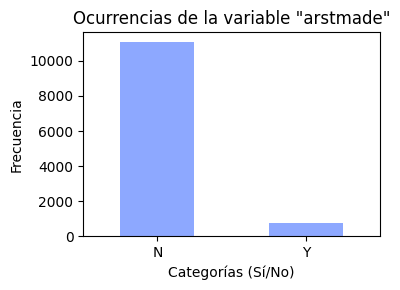

In [ ]:
#Para graficar importo la libreria (comento estas líneas porque la librería se cargo al inicio de este colab)
#import matplotlib.pyplot as plt

#Para estudiar la variable arstmade por si sola genero el conteo de ocurrencias para cada categoría de arstmade
#Para ello utilizo el método value_counts() sobre la variable de interés
ocurrencias = df_merge['arstmade'].value_counts()
#display(ocurrencias)

#Creo un gráfico de barras para visualizar la distribución de arstmade
plt.figure(figsize=(4, 3))
#Utilizo el método plot(kind='bar') sobre nuestra variable ocurrencias para mostrar la distribución en un gráfico de barras
#Con este método reduzco el código y no tenhgo que crear manualmente el gráfico de barras mediante plt.subplots() para obtener los ejes y llamar a ax.bar() para generar las barras del gráfico
ocurrencias.plot(kind='bar', color='#8DA8FF')
#Agrego los nombres de título y ejes
plt.title('Ocurrencias de la variable "arstmade"')
plt.xlabel('Categorías (Sí/No)')
plt.ylabel('Frecuencia')
#Aplico el siguiente código para evitar la rotación de las etiquetas del eje x
plt.xticks(rotation=0)

#Finalmente ajusto el marco de gráfico y lo muestro
plt.tight_layout()
plt.show()



En base al resultado obtenido, la variable respuesta por si sola (arstmade) indica si se realizó o no un arresto.

Del total de registros evaluados (n=11.823), hay 11.075 casos donde no se realizó un arresto (N), mientras que existen 748 reportes donde si se realizó un arresto (Y). Esto sugiere que en general, la mayoría de las situaciones no resultaron en arresto, ya que hay muchas más ocurrencias de "N" que de "Y".

#Actividad N°4.2

**4.2.- Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.**

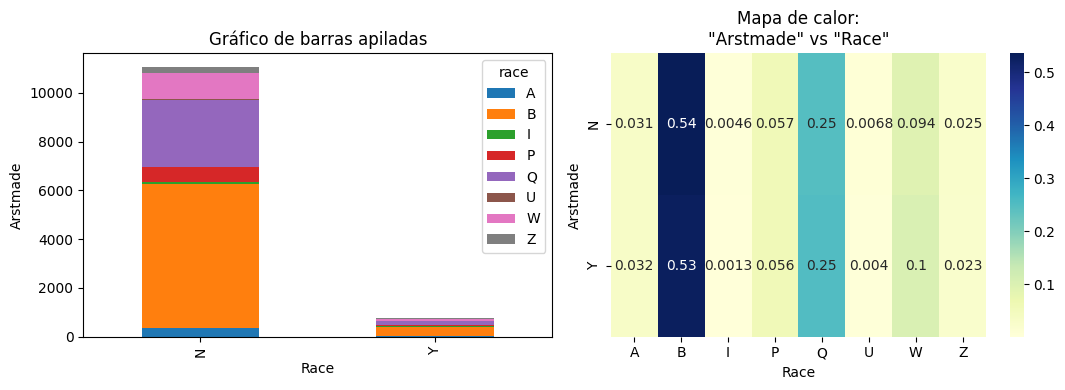

In [ ]:
#Para grafucar importo la libreria (comento estas líneas porque la librería se cargo al inicio de este colab)
#pd para manipular los datos, plt para visualizar los gráficos y sns para gráficos más avanzados
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

#Creo una tabla de contingencia para analizar la relación entre las dos variables mediante el uso del método crosstab()
#En particular, esta tabla miestra la ocurrencia de arstmade en cada categoría de race
tabla_contingencia = pd.crosstab(df_merge['arstmade'], df_merge['race'])
#display(tabla_contingencia)

#Aplico la normatización sobre la tabla de contingencia mediante el uso del parámetro normalize='index'
#Con esto genero una tabla que nos da las proporciones de cada categoría de race dentro de cada categoría de arstmade
matriz_frecuencia = pd.crosstab(df_merge['arstmade'], df_merge['race'], normalize='index')
#display(matriz_frecuencia)

#Para este ejercicio utilizo plt.subplot() para tener mayor flexibilidad y control sobre los gráficos a crear
#Defino el número de columnas para crear dos gráficos dentro de la ventana
#Ajusto la dimensión de los gráficos a 14x7"
fig, axes = plt.subplots(ncols=2, figsize=(11, 4))

#1-Grafico de barras apiladas
#Defino la ubicación del gráfico (1era columna), el tipo de gráfico y los nombres de titulo y ejes
ax1 = axes[0]
#Con kind='bar' defino que será un gráfico de barras y con stacked=True que será de barras apiladas
#Con ax=ax1 le indico que debe dibujarse en el primer subgráfico dentro de la venta de visualización establecida
tabla_contingencia.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Gráfico de barras apiladas')
ax1.set_xlabel('Race')
ax1.set_ylabel('Arstmade')

#2-Mapa de calor
#Defino la ubicación del gráfico (2da columna), el tipo de gráfico y los nombres de titulo y ejes
ax2 = axes[1]
#Con sns.heatmap() defino que será un mapa de calor que utilizará la matriz_frecuencia
#Con cmap='YlGnBu' elijo la paleta de color y con annot=True defino que se muestren los valores en las celdas del mapa
#Con ax=ax2 le indico que debe dibujarse en el segundo subgráfico dentro de la venta de visualización establecida
sns.heatmap(matriz_frecuencia, cmap='YlGnBu', annot=True, ax=ax2)
ax2.set_title('Mapa de calor:\n"Arstmade" vs "Race"')
ax2.set_xlabel('Race')
ax2.set_ylabel('Arstmade')

#Finalmente ajusto el diseño de forma automática para evitar superposiciones e imprimo la figura
plt.tight_layout()
plt.show()


A = Asiático/isleño del Pacífico

B = Negro

I = Indígena americano/nativo de Alaska

P = Negro-hispano

Q = Blanco-hispano

W = Blanco

X = Desconocido

Z = Otro

Los gráficos resultantes muestran la frecuencia de ocurrencia de arrestos (**Y**) y no arrestos (**N**) para cada categoría de la variable **race** (raza).
 Al respecto, cabe destacar lo siguiente:

* Las tasas más bajas de arrestos se registran para las razas I (n=1) y U (n=3).
* El 52,8%(n=395) de la totalidad de arrestos reportados se realizaron para la raza B. El 25,1%(n=188) corresponden a arrestos realizados a la raza Q.
* Para el resto de las razas, los registros de arrestos no difiere significativamente. Esto sugiere que la probabilidad de arresto en estas razas (A, P, X y Z) es similar.

#Actividad N°4.3a

**4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.**

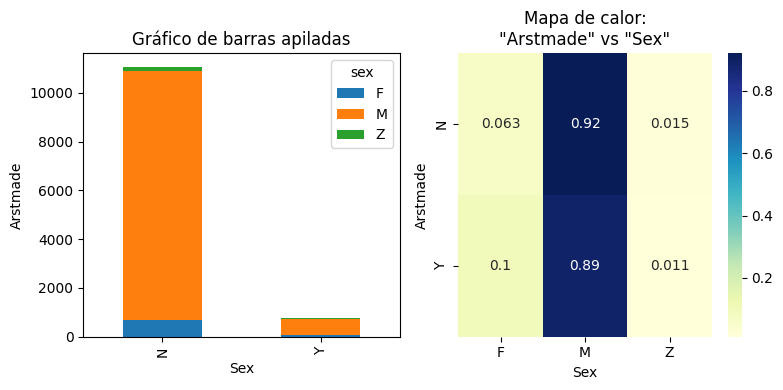

In [ ]:
#Para este ejercicio reutilizaré el código anterior y cambio la variable race por sex

#Creo una tabla de contingencia para analizar la relación entre las dos variables mediante el uso del método crosstab()
#En particular, esta tabla miestra la ocurrencia de arstmade en cada categoría de race
tabla_contingencia = pd.crosstab(df_merge['arstmade'], df_merge['sex'])
#display(tabla_contingencia)

#Aplico la normatización sobre la tabla de contingencia mediante el uso del parámetro normalize='index'
#Con esto genero una tabla que nos da las proporciones de cada categoría de race dentro de cada categoría de arstmade
matriz_frecuencia = pd.crosstab(df_merge['arstmade'], df_merge['sex'], normalize='index')
#display(matriz_frecuencia)

#Para este ejercicio utilizo plt.subplot() para tener mayor flexibilidad y control sobre los gráficos a crear
#Defino el número de columnas para crear dos gráficos dentro de la ventana
#Ajusto la dimensión de los gráficos a 14x7"
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

#1-Grafico de barras apiladas
#Defino la ubicación del gráfico (1era columna), el tipo de gráfico y los nombres de titulo y ejes
ax1 = axes[0]
#Con kind='bar' defino que será un gráfico de barras y con stacked=True que será de barras apiladas
#Con ax=ax1 le indico que debe dibujarse en el primer subgráfico dentro de la venta de visualización establecida
tabla_contingencia.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Gráfico de barras apiladas')
ax1.set_xlabel('Sex')
ax1.set_ylabel('Arstmade')

#2-Mapa de calor
#Defino la ubicación del gráfico (2da columna), el tipo de gráfico y los nombres de titulo y ejes
ax2 = axes[1]
#Con sns.heatmap() defino que será un mapa de calor que utilizará la matriz_frecuencia
#Con cmap='YlGnBu' elijo la paleta de color y con annot=True defino que se muestren los valores en las celdas del mapa
#Con ax=ax2 le indico que debe dibujarse en el segundo subgráfico dentro de la venta de visualización establecida
sns.heatmap(matriz_frecuencia, cmap='YlGnBu', annot=True, ax=ax2)
ax2.set_title('Mapa de calor:\n"Arstmade" vs "Sex"')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Arstmade')

#Finalmente ajusto el diseño de forma automática para evitar superposiciones e imprimo la figura
plt.tight_layout()
plt.show()

Con respecto a la frecuencia de arrestos por sexo, el 88,9%(n=665) de los registros de arrestos corresponden al sexo masculino, mientras que el 10,03%(n=75) corresponden a sexo Femenino, y tan sólo el 1%(n=8) de los registros corresponden a sexo desconocído.
Esto indica que los hombres tienen una mayor propensión a ser arrestados en comparación con las mujeres.

Por otro lado, en cuanto a los casos que no terminaron en arrestos, el 92,15% corresponden a sexo masculino, el 6,34% a femenino y el 1,5% a sexo desconocido.

Al respecto, cabe destacar que la proporción de arrestos para individuos de sexo desconocido es muy baja en ambos casos.

#Actividad N°4.3b

**4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.**

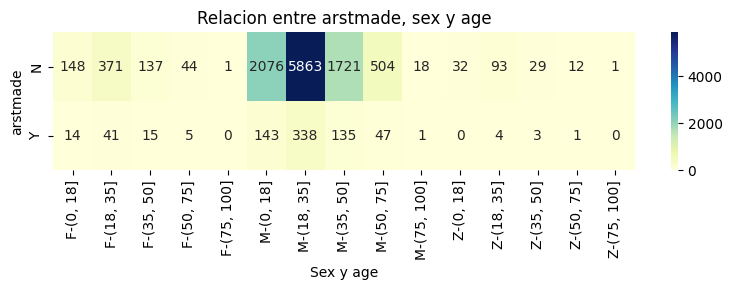

In [ ]:
#Importo las librerías necesarias (va comentado porque se llamaron al inicio de este colab)
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

#Creo una tabla de contingencia para analizar la relación entre las variables mediante el uso del método crosstab()
#En particular, esta tabla muestra la ocurrencia de arstmade en cada categoría de sexo y edad
tabla_contingencia = pd.crosstab(index=df_merge['arstmade'], columns=[df_merge['sex'], pd.cut(df_merge['age'], bins=[0, 18, 35, 50, 75, 100])])
#display(tabla_contingencia)

#Creo la ventana para los gráficos mediante el uso de subplots()
fig, axes = plt.subplots(ncols=1, figsize=(8,3))
#Defino la distancia inferior de la figura para que se ajuste adecuadamente
bottom_distance = 0.22
#Creo el mapa de calor utilizaron seaborn
#Utilizo annot=True para que pueda añadir anotaciones a las celdas del mapa de calor
#Utilizo fmt='d' para que las anotaciones sean números enteros
sns.heatmap(tabla_contingencia, cmap='YlGnBu', annot=True, fmt='d')
#Ajusto la distancia inferior de la figura para que se vean bien los ticks
plt.subplots_adjust(bottom=bottom_distance)
#Establezco los nombres del título y ejes
plt.title('Relacion entre arstmade, sex y age')
plt.xlabel('Sex y age')
plt.ylabel('arstmade')

#Finalmente ajusto el diseño de forma automática para evitar superposiciones e imprimo la figura
plt.tight_layout()
plt.show()

Para la tabla de contingencia se agruparon las edades por rangos (0-18, 18-35, 35-50, 50-75, 75-100) para facilitar el análisis.

De los resultados obtenidos se destaca lo siguiente:
* De la totalidad de casos que terminaron en arrestos, la mayoría corresponden a sexo masculino. En particular, el 45,2% (n=338) de los arrestos corresponden a sexo masculino con edad entre 18 y 35 años, seguido del 19,1% (n=143) sexo masculino menor a 18 años, y 18,05% (n=135) a sexo masculino de entre 35 y 50 años.
* No se registran arrestros para el sexo femenino y desconocido con edades entre 75 y 100 años, y sexo desconocido menor a 18 años.
* En cuanto a los casos que no terminaron en arresto, el 91,8% corresponden a sexo masculino con edades de 0 a 75 años.

#Actividad N°4.4

**4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y**

In [ ]:
#Recodificar la variable respuesta arstmade a 1(Y) y 0(N)
#Para ello utilizo la función map() en vez de replace() ya que es más eficiente para recodificar
df_merge['arstmade_map'] = df_merge['arstmade'].map({'N': 0, 'Y': 1})

#Imprimo las primeras 20 filas del df con la columna original y la recodificada
display(df_merge[['arstmade', 'arstmade_map']].head(20))


#Actividad N°4.5

**4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado, condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.**

sex              F                   M                   Z          
arstmade         N         Y         N         Y         N         Y
race                                                                
A         0.074176  0.005495  0.857143  0.060440  0.002747  0.000000
B         0.053072  0.007424  0.879640  0.054968  0.004897  0.000000
I         0.076923  0.000000  0.903846  0.019231  0.000000  0.000000
P         0.040238  0.004471  0.892697  0.058122  0.004471  0.000000
Q         0.060253  0.004451  0.870250  0.059226  0.005135  0.000685
U         0.089744  0.000000  0.782051  0.025641  0.089744  0.012821
W         0.097583  0.008953  0.828111  0.060877  0.004476  0.000000
Z         0.055363  0.000000  0.522491  0.041522  0.363322  0.017301

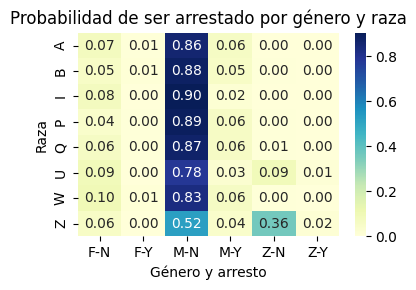

In [ ]:
#Importo las librerías necesarias (va comentado porque se llamaron al inicio de este colab)
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt

#Creo la tabla de contingencia para la relación entre raza, género y arresto
tabla_contingencia = pd.crosstab(index=df_merge['race'], columns=[df_merge['sex'], df_merge['arstmade']], normalize='index')
display(tabla_contingencia)

#Creo la ventana para el gráfico de heatmap
plt.figure(figsize=(4,3))

#Creo el mapa de calor para visualizar la tabla de contingencia
#Utilizo el annot=True para mostrar valores en las celdas del mapa de calor
#Utilizo el fmt='.2f' para indicar que dichos valores tendrán 2 decimales
sns.heatmap(tabla_contingencia, cmap='YlGnBu', annot=True, fmt='.2f')

#Defino el nombre del titulo y ejes
plt.title('Probabilidad de ser arrestado por género y raza')
plt.xlabel('Género y arresto')
plt.ylabel('Raza')

#Finalmente ajusto el diseño de forma automática para evitar superposiciones e imprimo la figura
plt.tight_layout()
plt.show()


Los resultados muestran las probabilidades de ser arrestado según el género y la raza de las personas.

En cuanto a las implicancias éticas, se observan diferencias significativas en las probabilidades de ser arrestado entre diferentes grupos de raza y sexo. Por ejemplo, en el grupo de hombres negros (B), la probabilidad de ser arrestado es notablemente alta en comparación con otros grupos raciales. Esto podría indicar un posible sesgo o discriminación racial en la forma y/o práctica en los casos policiales.

El hecho que esto ocurra, puede disminuir la confianza de la ciudadanía en las instituciones policiales. Además, esto podría percibirse como un tratamiento injusto y xenófobico, lo que podría generar resentimiento y desconfianza hacia las autoridades.

#Actividad N°5

**5.- Determinar si el procedimiento policial concluirá en alguna acción
violenta.**

Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'.

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [ ]:
#Primero creo la lista de columnas que indican si hubo fuerza física utilizada por el oficial
pf_columns = ['pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other']

#Creo una nueva variable 'violencia'
#Utilizo la función lambda con if-else para transformar a 1 las Y, y 0 a lo contrario
df_merge['violencia'] = df_merge[pf_columns].apply(lambda row: 1 if 'Y' in row.values else 0, axis=1)

#Calculo el porcentaje de casos que terminaron con violencia
#Para ello divido el número de casos con violencia igual a 1 entre el total de los casos y lo multilpico por 100 para obtener el porcentaje
porcentaje_violencia = (df_merge['violencia'].sum() / len(df_merge)) * 100
#Finalmente imprimo el resultado
print("Porcentaje de casos que terminaron con violencia: {:.2f}%".format(porcentaje_violencia))


Porcentaje de casos que terminaron con violencia: 24.59%


#Actividad N°6 Modelación

**6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año
2009 para entrenar, y el año 2010 para testear.**

In [38]:
#Primero selecciono las variables categóricas y numéricas
df_categorico = df_merge.select_dtypes(include=['object'])
df_numerico = df_merge.select_dtypes(include=['int', 'float'])

#Luego genero las variables dummies para las variables categóricas
#Para ello (y porque tuve complicaciones al ejecutar el código) limito la cantidad de variables dummies generadas
#Aplicando el número máximo 10 de categorías unicas para generar las dummies
max_unique_categories = 10
df_dummies = pd.DataFrame()
for col in df_categorico.columns:
    if df_categorico[col].nunique() <= max_unique_categories:
        dummies = pd.get_dummies(df_categorico[col], prefix=col, dtype='int64', drop_first=True)
        df_dummies = pd.concat([df_dummies, dummies], axis=1)

#Uno las variables numéricas y dummies en un único DataFrame mediante el uso del concat()
df_total = pd.concat([df_numerico, df_dummies], axis=1)

#Divido los datos en conjunto de entrenamiento y prueba para el año 2009
df_train = df_total[df_merge.year == 2009]
print("**** 2009 *****")
print(df_train.head(5))

#Divido los datos en conjunto de entrenamiento y prueba para el año 2010
df_test = df_total[df_merge.year == 2010]
print("**** 2010 ****")
print(df_test.head(5))

#Me dio error al ejecutarlo sin las siguiente líneas,asi que añadí este código
#Me aseguro de que 'arstmade' esté presente en df_train
if 'arstmade' not in df_train.columns:
    df_train['arstmade'] = df_merge.loc[df_merge.year == 2009, 'arstmade']

#Luego, ejecuto el train_test_split para dividir el conjunto de entrenamiento en variables independientes y variable respuesta (variable dependiente) para el año 2009
x_train_2009, x_test_2009, y_train_2009, y_test_2009 = train_test_split(df_train.drop('arstmade', axis=1), df_train['arstmade'], test_size=0.2)

#Divido el conjunto de entrenamiento en variables independientes y variable respuesta (variable dependiente) para el año 2010
x_train_2010, x_test_2010, y_train_2010, y_test_2010 = train_test_split(df_train.drop('arstmade', axis=1), df_train['arstmade'], test_size=0.2)

#De esta forma se muestra el conjunto de datos del año respectivo
#Luego se muestran las columnas binarias creadas para entrenar y testear, indicando la presencia (1) o ausencia (0) de ciertas condiciones
#Por ejemplo la columna "arstmade_Y" indica si se realizó un arresto durante la detención (1 si, 0 no).

**** 2009 *****
   Unnamed: 0  year  pct  ser_num  datestop  timestop  perobs  perstop  \
0      178048  2009   41     1779   4032009       130     1.0        2   
1      498873  2009  108     5805  10292009      1050     3.0        5   
2      463573  2009   43     8340  10062009      1450     1.0        1   
3       43626  2009   77      932   1232009      1843     5.0        5   
4      563921  2009  110    11224  12132009      1655     3.0       10   

   compyear  comppct  repcmd  revcmd       dob  age  ht_feet  ht_inch  weight  \
0         0        0      41      41   7111984   24        5        9     145   
1         0        0     108     108  12151993   15        5        5     140   
2         0        0      43      43   7031987   21        6        3     220   
3         0        0      77      77   3131986   22        5        5     120   
4         0        0     110     110   9221991   18        5        6     165   

   recstat_A  inout_O  trhsloc_H  trhsloc_P  trhsloc

#Actividad N°6 Modelación

**6.2 Entrene 4 modelos de clásificación y reporte el mejor modelo bajo algún criterio. Utilice validación cruzada de al menos 2 folds para probar distintos hiperparámetros para cada modelo (puede probar cualquier hiperparámetro, pero debe ser al menos uno).**

In [55]:
#Primero concateno los datos de entrenamiento de 2009 y 2010 evaluados en el ejrcicio anteior
df_train_merge = pd.concat([df_train, df_test])

#Para que no arroje error por incluir la variable arstmade que es categorica,
#La transformaré a binaria numérica conviertiendo Y a 1, N a 0, y los Nan a -1
df_train_merge['arstmade'] = df_train_merge['arstmade'].map({'N': 0, 'Y': 1, np.nan: -1})

#Luego defino los modelos en el orden deseado
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

#Genero la frase que quiero que se imprima como título de los resultados
#(previo al bucle para que se imprima una sola vez)
print("Reporte de Modelos de Clasificación evaluados:\n")

#Realizo el bucle for para ejecutar la validación cruzada y obtener el rendimiento de cada modelo
for name, model in models.items():
    #ejecuto la validación cruzada con los datos de entrenamiento combinados de 2009 y 2010
    scores = cross_val_score(model, df_train_merge.drop('arstmade', axis=1), df_train_merge['arstmade'], cv=2)

    #calculo las predicciones
    y_pred = cross_val_predict(model, df_train_merge.drop('arstmade', axis=1), df_train_merge['arstmade'], cv=2)

    #Calculo las metricas que me ayudarán a reportar el mejor modelo (acuracy, precisión, sensibilidad (recall) y puntaje F1)
    accuracy = accuracy_score(df_train_merge['arstmade'], y_pred)
    precision = precision_score(df_train_merge['arstmade'], y_pred, average='weighted')
    recall = recall_score(df_train_merge['arstmade'], y_pred, average='weighted')
    f1 = f1_score(df_train_merge['arstmade'], y_pred, average='weighted')

    #Imprimo los resultados de las métricas para cada modelo
    print(f"----------\n{name}:\n")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


Reporte de Modelos de Clasificación evaluados:

----------
Logistic Regression:

Accuracy: 0.5361583354478558
Precision: 0.526313622706372
Recall: 0.5361583354478558
F1 Score: 0.48909541279068036
----------
Random Forest:

Accuracy: 0.9999154190983676
Precision: 0.9999154345752024
Recall: 0.9999154190983676
F1 Score: 0.9999153621183606
----------
K-Nearest Neighbors:

Accuracy: 0.552228706758014
Precision: 0.534996453144767
Recall: 0.552228706758014
F1 Score: 0.5430625376162134
----------
Support Vector Machine:

Accuracy: 0.5365812399560179
Precision: 0.5228361926056627
Recall: 0.5365812399560179
F1 Score: 0.5288301128221243


En base a los resultados obtenidos, el modelo de Ramdom Forest parece ser el mejor en todas las métricas, incluyendo exactitud, precisión, sensibilidad, y valor F1, ya que fue el modelo que obtuvo los valores más altos entre las métricas evaluadas (>0,9).

#Bonus (20 pts)
**¿Qué puede hacer para mejorar la predicción de los modelos?**


*Respuesta:*

En primer lugar, analizar más a profundidad los datos que estamos utilizando para entender a qué corresponden los valores y como integrarlos de mejor forma a los modelos que deseamos evaluar. Por otro lado, utilizar la validación cruzada mejora el rendimiento de los modelos de machine learning. Por lo tanto, una forma de optimizar aun más la predicción de los modelos es ajustar más hioperparámetros e incluso incluir otros algoritmos que sean más ad hoc al conjunto de datos que se analiza. También para mejorar la predicción de modelos se podría explorar las variables que son redundantes y seleccionar las más relevantes dentro del conjunto de datos. Asimismo, algo que hacemos cuando realizamos analisis multivariados (yo soy del área ambiental asi que pondré este ejemplo pensando en los analisis RDA y CCA) en algunos analisis específicos conviene utilizar una variable que reune las características de 2 o más variables del conjujnto de datos (por ejemplo, si mi conjunto de datos tiene la cantidad de cationes por separado es decir Ca+, Na+, K+ en columnas separadas y cada una de estas muestra la misma tendencia en el sitio de estudio, entonces podríamos realizar una sumatoria y/o proporción como variable nueva que será más óptima de utilizar para reflejar la concentración de estos iones en vez de evaluar las 3 por separado en el conjunto de datos), y me imagino que en el caso de la predicción de los modelos también podría funcionar para optimizar dicha predicción.

